# Model Evaluation

On this notebook we are going to perform a deeper study of Model Evaluation. As we mentioned and concluded on the EDA Notebook, we are at least for now, pursuing the analysis with the dataframe thar include all the subcategories (labels) of each product.

## Models

In [8]:
import pandas as pd
import numpy as np
from scipy import sparse
import evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset

In [115]:
x_train = sparse.load_npz("/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Files/SpicyMatrixVectors/train_all_vect.npz")
x_test  = sparse.load_npz("/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Files/SpicyMatrixVectors/test_all_vect.npz")
y_train = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Files/y_train/y_train_all.csv", index_col=0)
y_test  = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Model/y_test_all.csv", index_col=0) 

In [52]:
print(type(x_train))
print(type(y_train), y_train.shape)
print(type(x_test))
print(type(y_test), y_test.shape)

<class 'scipy.sparse._csr.csr_matrix'>
<class 'pandas.core.frame.DataFrame'> (31650, 910)
<class 'scipy.sparse._csr.csr_matrix'>
<class 'pandas.core.frame.DataFrame'> (13582, 910)


We are going to do some experiments between these 3 different Methods:

    - BinaryRelevance
    - ClassifierChain
    - LabelPowerset

While trying 3 different classifiers such as LogisticRegression, RandomForest and SVM.

In [5]:
classifiers = [BinaryRelevance(classifier=LogisticRegression(), require_dense=[False, True]), BinaryRelevance(classifier=RandomForestClassifier(n_jobs = -1), require_dense=[False, True]), BinaryRelevance(classifier=SVC(), require_dense=[False, True])]
names = ["LogisticRegression", "RandomForestClassifier", "SVM"]
for i in range(len(classifiers)):
    evaluation.train_predict_model(x_train, y_train, x_test, y_test, classifiers[i], names[i])

LogisticRegression
The time it takes to fit the model is 88 seconds.
Evaluation Metrics
------------------------------
F1 Score: 0.7908934046699853
Recall Score: 0.6796381635091312
Precision Score: 0.9457028350898026
Hamming Loss: 0.0013629059793100434 

RandomForestClassifier
The time it takes to fit the model is 891 seconds.
Evaluation Metrics
------------------------------
F1 Score: 0.8411073825503355
Recall Score: 0.7486559139784946
Precision Score: 0.9596094946401225
Hamming Loss: 0.0010726867007238086 

SVM


In [16]:
classifiers = [ClassifierChain(classifier=LogisticRegression(), require_dense=[False, True]), ClassifierChain(classifier=RandomForestClassifier(n_jobs = -1), require_dense=[False, True]), ClassifierChain(classifier=SVC(), require_dense=[False, True])]
names = ["LogisticRegression", "RandomForestClassifier", "SVM"]
for i in range(len(classifiers)):
    evaluation.train_predict_model(x_train, y_train, x_test, y_test, classifiers[i], names[i])

LogisticRegression
The time it takes to fit the model is 95 seconds.
Evaluation Metrics
------------------------------
F1 Score: 0.8250384007355003
Recall Score: 0.7849675712578938
Precision Score: 0.8694203549233205
Hamming Loss: 0.0012625792702364636 

RandomForestClassifier
The time it takes to fit the model is 525 seconds.
Evaluation Metrics
------------------------------
F1 Score: 0.8597863124458562
Recall Score: 0.7940348182283666
Precision Score: 0.9374102712641362
Hamming Loss: 0.0009821499366485377 

SVM
The time it takes to fit the model is 536 seconds.
Evaluation Metrics
------------------------------
F1 Score: 0.848385996332779
Recall Score: 0.8489289981225465
Precision Score: 0.8478436887411575
Hamming Loss: 0.0011506826261648822 



In [6]:
classifiers = [LabelPowerset(classifier=LogisticRegression(), require_dense=[False, True]), LabelPowerset(classifier=RandomForestClassifier(n_jobs = -1), require_dense=[False, True]),
LabelPowerset(classifier=SVC(), require_dense=[False, True])]
names = ["LogisticRegression", "RandomForestClassifier", "SVM"]
for i in range(len(classifiers)):
    evaluation.train_predict_model(x_train, y_train, x_test, y_test, classifiers[i], names[i])

LogisticRegression
The time it takes to fit the model is 131 seconds.
Evaluation Metrics
------------------------------
F1 Score: 0.8384247879890617
Recall Score: 0.8405444615122034
Precision Score: 0.8363157783013861
Hamming Loss: 0.0012285976429696058 

RandomForestClassifier
The time it takes to fit the model is 34 seconds.
Evaluation Metrics
------------------------------
F1 Score: 0.8791253204003276
Recall Score: 0.881741764806281
Precision Score: 0.8765243579139361
Hamming Loss: 0.0009195266521138999 

SVM
The time it takes to fit the model is 185 seconds.
Evaluation Metrics
------------------------------
F1 Score: 0.8742195228319487
Recall Score: 0.8767281105990783
Precision Score: 0.8717252497825672
Hamming Loss: 0.0009567446248347441 



## Hyperparameters Tunning

I am doing a GridSearch for the best classifier (being evaluate with the parameters mentioned on the EDA -> Performance, Efficiency and with the addition of its weights). I discovered the importance of this last characteristic after performing the training, as the RandomForest weight way more than the others classifiers (around 10 times more). Having said this, the classifiers chosen is the LabelPowerset(SVM())!

In [5]:
param_grid = {
 "classifier": [SVC()],
 'classifier__C': [0.75, 1.0, 1.25],
 'classifier__kernel': ['rbf', 'poly', "sigmoid"],
 'classifier__gamma': ["scale","auto"],
}

evaluation.train_predict_model_gridsearch(x_train, y_train, x_test, y_test, method=LabelPowerset(), param_grid=param_grid, cv=3, scoring ="f1_micro")


Training...
We have finished!
The time it takes to fit the model is 36844 seconds.
Evaluation Metrics
------------------------------
F1 Score: 0.8665681197026575
Recall Score: 0.8692396313364056
Precision Score: 0.8639129789444668
Hamming Loss: 0.0010151606602791996 

Best params: {'classifier': SVC(C=1.25, kernel='sigmoid'), 'classifier__C': 1.25, 'classifier__gamma': 'scale', 'classifier__kernel': 'sigmoid'}


## Neural Networks

In this case we are going to use the famous library Keras to develop our Neural Network, starting from Keras Sequential model and using built-in functions and method specifically design for NLP problems.
Firstly, we want our text already normalized but not embedded neither tokenized, as Keras has its own preprocessing methods to do this.

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
import io
import json 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
#Let´s upload our dataset
df = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Files/Dataframes/dataframe_all.csv", index_col=0)
print(df.shape)

(45232, 911)


In [7]:
# First Step -> Tokenize and padd
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>") #num_words : the maximum number of words to keep, based on word frequency (for the 45232 products information), #oov : out-of-vocabulary token, it is agregated to words which are not in the 10000 most frequent ones
tokenizer.fit_on_texts(df['information'])# encoding words of information to integers, Updates internal vocabulary based on a list of sequences.

#Let´s save the tokenizer for later use
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))
word_index = tokenizer.word_index

print("Amount of different words through the 45232 products information:",len(word_index))
sequences = tokenizer.texts_to_sequences(df['information'])
print("Amount of sequences:", len(sequences)) #Should be equal to the amount of products 
print("Sequences Examples:",sequences[0], sequences[1], sequences[2]) #This is how the first 3 products info are represented, each number represent a word in "word_index" dict.
padded = pad_sequences(sequences, padding="post") #This takes the maxlen parameter as a referene and makes all the lists of the same lenght adding zeros on the left spaces, if nothins is pass ot will take the longest sequence as a reference
print("First Sequence padded: \n",padded[0])
print("Should be all equals:", len(padded[0]), len(padded[1]), len(padded[2]))
print("Dataset Padded Shape:", padded.shape)

Amount of different words through the 45232 products information: 38520
Amount of sequences: 45232
Sequences Examples: [3376, 1714, 31, 2769, 17, 166, 47, 1714, 268, 4648, 13, 2824, 22, 53] [3376, 1224, 118, 1, 31, 1, 1475, 4648, 13, 2824, 22, 1797, 952, 140, 190, 137, 7344] [3376, 1224, 31, 2769, 17, 166, 47, 1224, 268, 4648, 13, 2824, 22, 53]
First Sequence padded: 
 [3376 1714   31 2769   17  166   47 1714  268 4648   13 2824   22   53
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
Should be all equals: 57 57 57
Dataset Padded Shape: (45232, 57)


In [10]:
from sklearn.model_selection import train_test_split

In [65]:
# Splitting dataset in train/test set
X_train, X_test, y_train, y_test = train_test_split(padded, df[df.columns[1:]], test_size=0.3, random_state=27)

In [66]:
print(X_train.shape, type(X_train))
print(X_test.shape, type(X_test))
print(y_train.shape, type(y_train))
print(y_test.shape, type(y_test))

(31662, 57) <class 'numpy.ndarray'>
(13570, 57) <class 'numpy.ndarray'>
(31662, 910) <class 'pandas.core.frame.DataFrame'>
(13570, 910) <class 'pandas.core.frame.DataFrame'>


Let´s move on to the Modeling part...

In [11]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import nn_aux
from IPython.display import Image

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [69]:
num_classes = y_train.shape[1]
print("Number of classes:",num_classes)
max_words = len(word_index) + 1
print("Number of different words:",max_words)
maxlen = len(padded[0])
print("Padded Length:", maxlen)

Number of classes: 910
Number of different words: 38521
Padded Length: 57


In [82]:
#Let´s buils our NN BaseLine Model
model = Sequential()
model.add(Embedding(max_words, 300, input_length=maxlen)) 
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=['Precision','Recall', tf.keras.metrics.AUC()])
callbacks = [
    ReduceLROnPlateau(), # Reduce learning rate when a metric has stopped improving
    ModelCheckpoint(filepath='model-neural-net.h5', save_best_only=True)
]

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 57, 300)           11556300  
                                                                 
 dense_5 (Dense)             (None, 57, 300)           90300     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 300)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 910)               273910    
                                                                 
Total params: 11,920,510
Trainable params: 11,920,510
Non-trainable params: 0
_________________________________________________________________


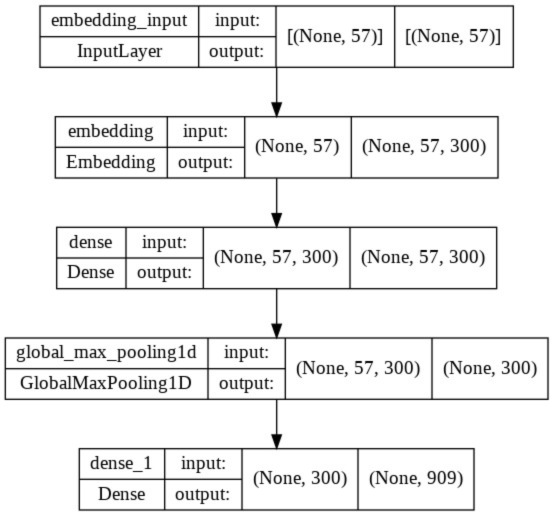

In [5]:
Image('/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Mi proyecto (1).jpg')

In [83]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.3, callbacks=callbacks)

Epoch 1/30
693/693 [==============================] - 89s 127ms/step - loss: 0.0142 - precision: 0.6319 - recall: 0.5740 - auc_3: 0.9126 - val_loss: 0.0107 - val_precision: 0.7834 - val_recall: 0.7027 - val_auc_3: 0.9267 - lr: 0.0150
Epoch 2/30
693/693 [==============================] - 93s 135ms/step - loss: 0.0111 - precision: 0.7577 - recall: 0.7261 - auc_3: 0.9330 - val_loss: 0.0117 - val_precision: 0.7639 - val_recall: 0.7378 - val_auc_3: 0.9371 - lr: 0.0150
Epoch 3/30
693/693 [==============================] - 94s 135ms/step - loss: 0.0081 - precision: 0.8057 - recall: 0.7650 - auc_3: 0.9544 - val_loss: 0.0093 - val_precision: 0.8113 - val_recall: 0.7436 - val_auc_3: 0.9431 - lr: 0.0150
Epoch 4/30
693/693 [==============================] - 98s 142ms/step - loss: 0.0065 - precision: 0.8256 - recall: 0.7792 - auc_3: 0.9634 - val_loss: 0.0092 - val_precision: 0.8242 - val_recall: 0.7264 - val_auc_3: 0.9447 - lr: 0.0150
Epoch 5/30
693/693 [==============================] - 98s 141ms/

In [101]:
import imp

imp.reload(nn_aux)

<module 'nn_aux' from '/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Model/nn_aux.py'>

425/425 [==============================] - 3s 6ms/step - loss: 0.0084 - precision: 0.8809 - recall: 0.7026 - auc_3: 0.9685
None


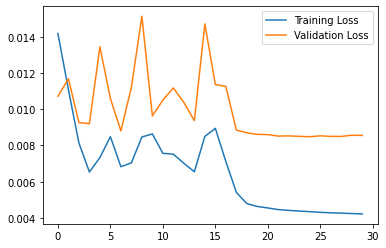

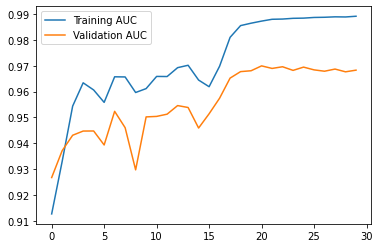

In [102]:
#Training vs Validation plot (to check overfitting)
print(nn_aux.get_metrics(model, X_test, y_test))
nn_aux.train_vs_valid(history, "loss", "val_loss", "auc_3", "val_auc_3")

In [104]:
#Model Evaluation with Standar Metrics
predictions = model.predict(X_test, batch_size=32)
nn_aux.get_standar_metrics(predictions, y_test)

425/425 [==============================] - 2s 6ms/step
Evaluation Metrics
------------------------------
F1 Score: 0.7817465029567531
Recall Score: 0.7026340505464481
Precision Score: 0.8809345394208639
Hamming Loss: 0.0014884157846574942 



In [105]:
#Let´s see some results for 5 examples defined on nn_aux
classes = [col for col in df.columns]
classes = classes[1:-1]
examples = nn_aux.examples()
for i in range(len(examples)):
    name = examples[i][0]
    description = examples[i][1]
    pred = nn_aux.categoryPredictionNN(name, description, classes, tokenizer, model, maxlen)
    print(pred)

1/1 [==============================] - 0s 104ms/step
[('Main Category_Appliances', 0.9553958), ('1st Subcategory_Small Kitchen Appliances', 7.138914e-08), ('1st Subcategory_Bluetooth & Wireless Speakers', 7.504935e-10), ('1st Subcategory_Computer Accessories & Peripherals', 3.693741e-13), ('2nd Subcategory_All Microwaves', 3.5446895e-13)]
1/1 [==============================] - 0s 31ms/step
[('Main Category_Computers & Tablets', 0.99987775), ('1st Subcategory_Computer Accessories & Peripherals', 0.98784965), ('2nd Subcategory_All Laptops', 0.8768946), ('1st Subcategory_Laptops', 0.80346537), ('3rd Subcategory_PC Laptops', 0.31887802)]
1/1 [==============================] - 0s 20ms/step
[('1st Subcategory_Software', 0.31270227), ('Main Category_Musical Instruments', 0.22785255), ('Main Category_Computers & Tablets', 0.20177145), ('2nd Subcategory_Music, Photo & Video Editing', 0.14578706), ('Main Category_Video Games', 0.091225855)]
1/1 [==============================] - 0s 25ms/step
[('

Let´s try a model a little bit more complex

In [17]:
from keras.layers import Activation, Conv1D

In [108]:

model = Sequential()
model.add(Embedding(max_words, 300, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(300, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D()) # This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision','Recall', tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 57, 300)           11556300  
                                                                 
 dropout_4 (Dropout)         (None, 57, 300)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 55, 300)           270300    
                                                                 
 global_max_pooling1d_5 (Glo  (None, 300)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 910)               273910    
                                                      

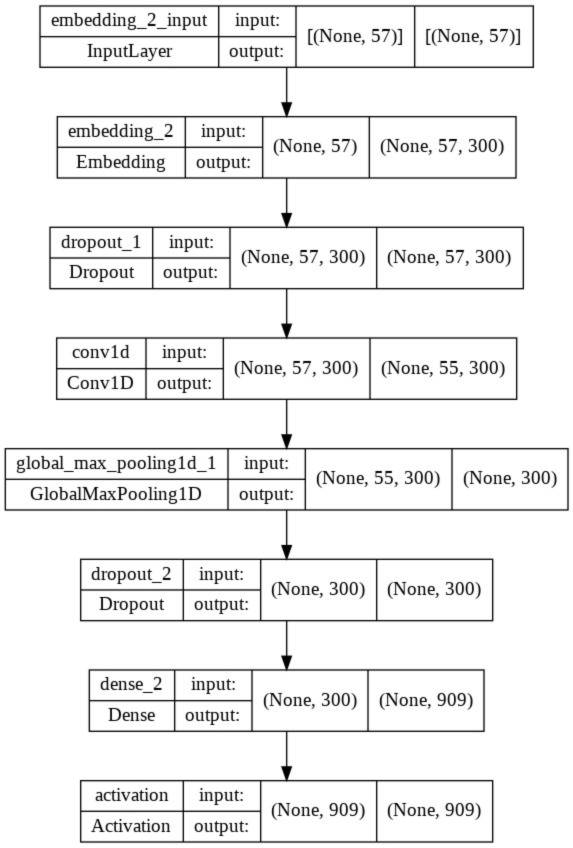

In [6]:
Image('/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Mi proyecto.jpg')

Let´s discuss and clarify how the NN is composed...
NOTE: We are building based on the "Sequential Style", hence we are going to add layer by layer rather than composing them

-Input Layer: This layer is not "defined" in the NN because it is not neccesary to do so, it´s already defined on the Embedding Layer with the "input_length" parameter. Also this layer tipically does not belong to the "Hidden Layers" when defining a NN.

-EmbeddingLayer: It takes 3 parameters -> {input_dim : Size of the vocabulary, output_dim : Length of the vector for each word, input_length : Maximum length of a sequence}

"Embedding layer enables us to convert each word into a fixed length vector of defined size. The resultant vector is a dense one with having real values instead of just 0’s and 1’s. The fixed length of word vectors helps us to represent words in a better way along with reduced dimensions.This way embedding layer works like a lookup table. The words are the keys in this table, while the dense word vectors are the values."

This Layer recieves each "information row" already padded, Once the training is completed, embedding layer has learnt the weights (which are nothing but the vector representations of each word).
The length of this vector was given as a parameter, in our case 300. So, the layer is returning a matrix of 57 words which each one of them are represented with another vector of 300 values.

Example:

(padded input) = [467, 346, 67, 8, 7, 0, 0, ... 0] -> (training) -> < <0.344, 0.123, 0.790, ..., 0.192>, <0.311, 0.193, 0.890, ..., 0.112>, ...., <0.211, 0.199, 0.290, ..., 0.912> >]

OBS: 
The length of the padded row is of 57.
The length of the matrix after training is of 57 and of each vector is of 300

-DropoutLayer: It takes 1 parameter -> {rate: It represents the fraction of the input units to drop}

Basically, it means that 20% of the neurons in this layer will be randomly dropped in each epoch.

....

In [109]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/30
693/693 [==============================] - 104s 148ms/step - loss: 0.0303 - precision: 0.1701 - recall: 0.1054 - auc_5: 0.8103 - val_loss: 0.0130 - val_precision: 0.9017 - val_recall: 0.3236 - val_auc_5: 0.9022 - lr: 0.0010
Epoch 2/30
693/693 [==============================] - 111s 160ms/step - loss: 0.0101 - precision: 0.8823 - recall: 0.4472 - auc_5: 0.9323 - val_loss: 0.0072 - val_precision: 0.9123 - val_recall: 0.5871 - val_auc_5: 0.9691 - lr: 0.0010
Epoch 3/30
693/693 [==============================] - 104s 150ms/step - loss: 0.0063 - precision: 0.9004 - recall: 0.6266 - auc_5: 0.9738 - val_loss: 0.0051 - val_precision: 0.9078 - val_recall: 0.7023 - val_auc_5: 0.9831 - lr: 0.0010
Epoch 4/30
693/693 [==============================] - 101s 146ms/step - loss: 0.0045 - precision: 0.9108 - recall: 0.7206 - auc_5: 0.9863 - val_loss: 0.0043 - val_precision: 0.9064 - val_recall: 0.7692 - val_auc_5: 0.9873 - lr: 0.0010
Epoch 5/30
693/693 [==============================] - 115s 1

425/425 [==============================] - 3s 7ms/step - loss: 0.0038 - precision: 0.9187 - recall: 0.8757 - auc_5: 0.9753
None


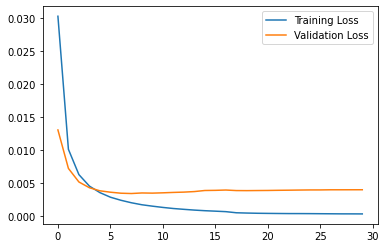

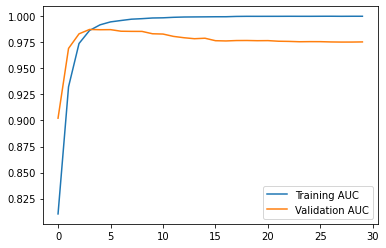

In [110]:
#Training vs Validation plot (to check overfitting)
print(nn_aux.get_metrics(model, X_test, y_test))
nn_aux.train_vs_valid(history, "loss", "val_loss", "auc_5", "val_auc_5")

In [111]:
#Model Evaluation with Standar Metrics
predictions = model.predict(X_test, batch_size=32)
nn_aux.get_standar_metrics(predictions, y_test)

425/425 [==============================] - 4s 9ms/step
Evaluation Metrics
------------------------------
F1 Score: 0.8966677959803718
Recall Score: 0.8756617144808743
Precision Score: 0.918706469890041
Hamming Loss: 0.0007656676411282159 



In [112]:
#Let´s see some results for 5 examples defined on nn_aux
classes = [col for col in df.columns]
classes = classes[1:-1]
examples = nn_aux.examples()
for i in range(len(examples)):
    name = examples[i][0]
    description = examples[i][1]
    pred = nn_aux.categoryPredictionNN(name, description, classes, tokenizer, model, maxlen)
    print(pred)

1/1 [==============================] - 0s 22ms/step
[('Main Category_Appliances', 0.9999999), ('1st Subcategory_Microwaves', 0.07958317), ('2nd Subcategory_All Microwaves', 0.068600185), ('1st Subcategory_Small Kitchen Appliances', 4.3632667e-06), ('3rd Subcategory_Food Preparation Utensils', 3.5058595e-06)]
1/1 [==============================] - 0s 21ms/step
[('Main Category_Computers & Tablets', 0.99998915), ('1st Subcategory_Computer Accessories & Peripherals', 0.06387011), ('1st Subcategory_Laptops', 0.00016532991), ('2nd Subcategory_All Laptops', 0.00012862573), ('2nd Subcategory_Hard Drives & Storage', 4.2934877e-05)]
1/1 [==============================] - 0s 19ms/step
[('Main Category_TV & Home Theater', 0.010524621), ('Main Category_Appliances', 0.0016988218), ('1st Subcategory_TV Stands, Mounts & Furniture', 9.917997e-05), ('Main Category_Computers & Tablets', 7.80624e-05), ('1st Subcategory_Computer Accessories & Peripherals', 4.1859097e-05)]
1/1 [============================

## Conclusions

Observing the results we can appreciate a pattern, it is very common to see at least one random class per products.
For example, when predicting the Desk example (penultimate of above print), let´s observe "Main Category_Computers & Tablets" as it third sub-category. This may be due to an excess of subcategories at the time of having done the OneHotEncoder, hence the incapability of the model to learn from its most relevant categories. Also, mostly all the classes belong to the Main, first or second Subcategory... So, let´s try this same model with less subcategories as Labels. For now, it would be nice trying it with three categories, the Main and the following to subcategories.

OBS: Also, a new function is going to be add at the time of returning the output labels, in order to "clean" the names and to considerate the most relevant for each specific category.

In [12]:
#Let´s upload our dataset
df = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Files/Dataframes/dataframe_2.csv", index_col=0) #DataFrame made out of two subcategories
print(df.shape)

(45232, 497)


In [13]:
# First Step -> Tokenize and padd
tokenizer_2 = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer_2.fit_on_texts(df['information'])

#Let´s save the tokenizer for later use
tokenizer_json_2 = tokenizer_2.to_json()
with io.open('tokenizer_2.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json_2, ensure_ascii=False))
word_index = tokenizer_2.word_index
print("Amount of different words through the 45232 products information:",len(word_index))
sequences = tokenizer_2.texts_to_sequences(df['information'])
print("Amount of sequences:", len(sequences))  
print("Sequences Examples:",sequences[0], sequences[1], sequences[2]) 
padded = pad_sequences(sequences, padding="post") 
print("First Sequence padded: \n",padded[0])
print("Should be all equals:", len(padded[0]), len(padded[1]), len(padded[2]))
print("Dataset Padded Shape:", padded.shape)

Amount of different words through the 45232 products information: 38520
Amount of sequences: 45232
Sequences Examples: [3376, 1714, 31, 2769, 17, 166, 47, 1714, 268, 4648, 13, 2824, 22, 53] [3376, 1224, 118, 1, 31, 1, 1475, 4648, 13, 2824, 22, 1797, 952, 140, 190, 137, 7344] [3376, 1224, 31, 2769, 17, 166, 47, 1224, 268, 4648, 13, 2824, 22, 53]
First Sequence padded: 
 [3376 1714   31 2769   17  166   47 1714  268 4648   13 2824   22   53
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
Should be all equals: 57 57 57
Dataset Padded Shape: (45232, 57)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(padded, df[df.columns[1:]], test_size=0.3, random_state=27)

In [19]:
print(X_train.shape, type(X_train))
print(X_test.shape, type(X_test))
print(y_train.shape, type(y_train))
print(y_test.shape, type(y_test))

(31662, 57) <class 'numpy.ndarray'>
(13570, 57) <class 'numpy.ndarray'>
(31662, 496) <class 'pandas.core.frame.DataFrame'>
(13570, 496) <class 'pandas.core.frame.DataFrame'>


In [15]:
num_classes = y_train.shape[1]
print("Number of classes:",num_classes)
max_words = len(word_index) + 1
print("Number of different words:",max_words)
maxlen = len(padded[0])
print("Padded Length:", maxlen)

Number of classes: 496
Number of different words: 38521
Padded Length: 57


In [25]:
model = Sequential()
model.add(Embedding(max_words, 300, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(300, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D()) # This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision','Recall', tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model_2-conv1d.h5', save_best_only=True)
]

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 57, 300)           11556300  
                                                                 
 dropout_1 (Dropout)         (None, 57, 300)           0         
                                                                 
 conv1d (Conv1D)             (None, 55, 300)           270300    
                                                                 
 global_max_pooling1d (Globa  (None, 300)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense (Dense)               (None, 496)               149296    
                                                      

In [26]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.3, callbacks=callbacks)

Epoch 1/30
693/693 [==============================] - 105s 149ms/step - loss: 0.0346 - precision: 0.3438 - recall: 0.2092 - auc: 0.8615 - val_loss: 0.0130 - val_precision: 0.9110 - val_recall: 0.5226 - val_auc: 0.9552 - lr: 0.0010
Epoch 2/30
693/693 [==============================] - 107s 154ms/step - loss: 0.0099 - precision: 0.9146 - recall: 0.6128 - auc: 0.9667 - val_loss: 0.0070 - val_precision: 0.9175 - val_recall: 0.7405 - val_auc: 0.9851 - lr: 0.0010
Epoch 3/30
693/693 [==============================] - 111s 159ms/step - loss: 0.0060 - precision: 0.9289 - recall: 0.7585 - auc: 0.9871 - val_loss: 0.0052 - val_precision: 0.9192 - val_recall: 0.8141 - val_auc: 0.9907 - lr: 0.0010
Epoch 4/30
693/693 [==============================] - 110s 158ms/step - loss: 0.0042 - precision: 0.9421 - recall: 0.8276 - auc: 0.9933 - val_loss: 0.0045 - val_precision: 0.9288 - val_recall: 0.8435 - val_auc: 0.9909 - lr: 0.0010
Epoch 5/30
693/693 [==============================] - 105s 151ms/step - loss

425/425 [==============================] - 4s 8ms/step - loss: 0.0047 - precision: 0.9384 - recall: 0.9003 - auc: 0.9797
None


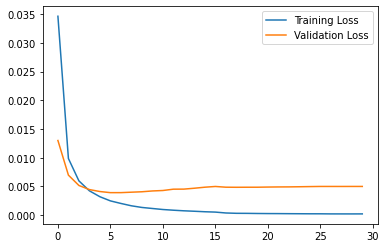

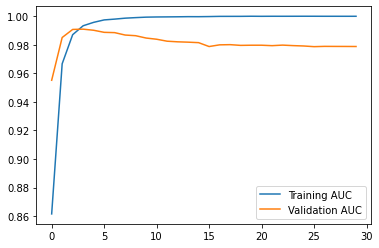

In [27]:
#Training vs Validation plot (to check overfitting)
print(nn_aux.get_metrics(model, X_test, y_test))
nn_aux.train_vs_valid(history, "loss", "val_loss", "auc", "val_auc")

In [28]:
#Model Evaluation with Standar Metrics
predictions = model.predict(X_test, batch_size=32)
nn_aux.get_standar_metrics(predictions, y_test)

425/425 [==============================] - 3s 7ms/step
Evaluation Metrics
------------------------------
F1 Score: 0.9189696665168064
Recall Score: 0.9003264587003834
Precision Score: 0.9384012962462868
Hamming Loss: 0.000910452373594504 



In [132]:
#Let´s see some results for 5 examples defined on nn_aux
classes = [col for col in df.columns]
classes = classes[1:-1]
examples = nn_aux.examples()
for i in range(len(examples)):
    info = str(examples[i])
    pred = nn_aux.categoryPredictionNN(info, classes, tokenizer, model, maxlen)
    print(pred)

1/1 [==============================] - 0s 26ms/step
['Appliances', 'Microwaves', 'All Microwaves']
1/1 [==============================] - 0s 29ms/step
['Computers & Tablets', 'Laptops', 'All Laptops']
1/1 [==============================] - 0s 36ms/step
['TV & Home Theater', 'TVs', 'Remote Controls']
1/1 [==============================] - 0s 20ms/step
['Appliances', 'Washers & Dryers', 'Washing Machines']
1/1 [==============================] - 0s 21ms/step
['Musical Instruments', 'Musical Instrument Accessories', 'Sheet Music']
1/1 [==============================] - 0s 29ms/step
['Appliances', 'Small Kitchen Appliances', 'Kitchen Gadgets']
1/1 [==============================] - 0s 21ms/step
['TV & Home Theater', 'Streaming Media Players', 'TV Mounts']
1/1 [==============================] - 0s 20ms/step
['Connected Home & Housewares', 'Office Furniture & Storage', 'Desks']
1/1 [==============================] - 0s 23ms/step
['Appliances', 'Small Kitchen Appliances', 'Coffee, Tea & Espres

Well, now we can observe much more narrow results. In the end, the best option possible was not keeping all the subcategories as I first thought from my Baseline Model experiment but only just a few of them.